# 2.1 Source

Connecting to the database

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#connect to the SQLite database
db = sqlite3.connect('data/org_compliance_data.db')

# Query to get the list of tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", db)


inspecting the different tables in the database

In [2]:
#available tables in the database
print(tables)

#first rows of the each table
for name in tables["name"]:
    print(f"table: {name}")
    preview = pd.read_sql(f"SELECT * FROM {name} LIMIT 5;", db)
    print(preview)
    

                       name
0               departments
1  risk_summary_by_division
2     high_risk_departments
3           data_dictionary
table: departments
     dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2          None        None             NaN          None      None   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  rep

Loading the departement table / possible main table

In [3]:
#Loading the departement table / possible main table
departments = pd.read_sql("SELECT * FROM departments", db)
departments.head()

#inspecting the departments table
departments.info()
departments.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dept_id                          709 non-null    object 
 1   dept_name                        709 non-null    object 
 2   dept_category                    709 non-null    object 
 3   division                         455 non-null    object 
 4   dept_type                        413 non-null    object 
 5   dept_age_years                   411 non-null    float64
 6   location_type                    410 non-null    object 
 7   team_size                        409 non-null    object 
 8   reporting_structure              413 non-null    object 
 9   manager_experience_level         413 non-null    float64
 10  supervisor_experience_level      409 non-null    float64
 11  primary_function                 416 non-null    object 
 12  secondary_function    

,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,...,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
count,709,709,709,455,413,411.000000,410,409,413,413.000000,...,410.000000,406.000000,416.000000,410.000000,411.000000,412.000000,430.000000,435.000000,433.000000,409.000000
unique,682,454,3,2,6,NaN,4,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DEPT-9694,Tactical Quality Assurance,Financial_Reporting,Corporate_HQ,Support,NaN,Urban,Large,Centralized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,5,419,428,206,NaN,304,272,332,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.802920,NaN,NaN,NaN,2.624697,...,3.190244,3.086207,1.673077,2.360976,3.491484,5.114078,61.707209,62.113333,63.955427,26.783619
std,NaN,NaN,NaN,NaN,NaN,1.915939,NaN,NaN,NaN,1.164637,...,1.061854,1.190479,1.112404,1.361877,1.447218,6.514748,12.927911,13.338300,13.693694,19.144580
min,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,30.000000,0.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,2.000000,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,54.125000,54.900000,55.000000,12.000000
50%,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,3.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,60.000000,60.000000,65.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,4.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,70.000000,70.000000,75.000000,34.000000


inspecting the different dict

In [4]:
#inspecting the different dict
dtype_dict = pd.read_sql("SELECT * FROM data_dictionary", db)
dtype_dict.head(20)

,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,Primary compliance category (Financial_Reporti...
3,departments,division,string,"Organizational division (Corporate_HQ, Regiona..."
4,departments,dept_type,string,"Department type (Operations, Support, Complian..."
5,departments,dept_age_years,integer,Age of department in years since establishment
6,departments,location_type,string,"Geographic location type (Urban, Remote, Subur..."
7,departments,team_size,string,"Team size category (Small, Medium, Large)"
8,departments,reporting_structure,string,"Reporting hierarchy (Centralized, Autonomous, ..."
9,departments,manager_experience_level,integer,Manager experience level (0=none to 4=extensive)


# Explaination
• departments

This is the main table that includes comprehensive data for every department, such as operational traits, metrics related to compliance, reporting practices, managerial experience levels, training hours, and past infractions.
This table will be the primary analytical dataset for this project and offers the row-level data required to model compliance risks.

• risk_summary_by_division

This table seems to include division-level aggregated metrics (e.g., Corporate HQ, Regional Ops).
Although it is not detailed enough to serve as the primary modeling dataset, it offers summary risk indicators that could be helpful for contextual analysis.

• high_risk_departments

Departments marked as high-risk are listed in this table, most likely due to threshold conditions or previous evaluations.
It does not take the place of the complete departments table, but it can be used as an external reference for comparison, validation, or exploratory insights.

• data_dictionary

Every variable in the database has its definition, data type, and description listed in this table.
It is used to accurately interpret the meaning of features, discern between numerical and categorical fields, and direct preprocessing operations like scaling, outlier detection, and encoding.

Main Dataset for Analysis

The departments table will serve as the primary dataset for this project since it includes every department-level feature required for machine learning analysis that is compliance-focused.
Other tables won't make up the main analytical framework, but they might be added later for additional insights.

# 2.2 Data Cleaning

analysis of missing value

In [5]:
#analysis of missing value
miss_counts = departments.isnull().sum()
miss_percent = (departments.isnull().mean() * 100).round(2)

#create a table to summarize missing values
miss_table = pd.DataFrame({
    "miss_counts": miss_counts,
    "miss_percent": miss_percent
}).sort_values(by="miss_percent", ascending=False)

miss_table

,miss_counts,miss_percent
digital_systems,304,42.88
external_interactions_frequency,303,42.74
interdept_collaboration_score,303,42.74
oversight_body,303,42.74
violations_past_3years,303,42.74
onboarding_program,302,42.60
overall_risk_score,300,42.31
training_hours_quarterly,300,42.31
team_size,300,42.31
external_partnerships,300,42.31


Cleaning Data

In [6]:
#separating numerical and categorical columns
num_col = departments.select_dtypes(include=["float64", "int64"]).columns
categorical_col = departments.select_dtypes(include=["object"]).columns

num_col, categorical_col

#cleaning numberical columns by filling missing values with median
for col in num_col:
    median_value = departments[col].median()
    departments[col] = departments[col].fillna(median_value)

#cleaning categorical columns by filling missing values with mode
for col in categorical_col:
    mode_value = departments[col].mode()[0]
    departments[col] = departments[col].fillna(mode_value)

#check if there are any missing values left
departments.isnull().sum().sum()



0

# 2.4 Outlier analysis

Checking for outliers

values below:

𝑄1 − 1.5 × 𝐼𝑄𝑅

or above:

𝑄3 + 1.5 × 𝐼𝑄𝑅


In [7]:
num_columns = departments.select_dtypes(include=["float64", "int64"]).columns

outliers = {}

for col in num_columns:
    Q1 = departments[col].quantile(0.25)
    Q3 = departments[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_condition = departments[(departments[col] < lower_bound) | (departments[col] > upper_bound)][col]
    
    outliers[col] = len(outlier_condition)

outlier = pd.DataFrame.from_dict(outliers, orient='index', columns=['outlier_count'])
outlier.sort_values(by='outlier_count', ascending=False)

,outlier_count
risk_exposure_financial,327
external_interactions_frequency,286
resource_availability_score,257
overall_risk_score,239
training_hours_quarterly,233
interdept_collaboration_score,219
audit_score_q2,199
compliance_score_final,194
audit_score_q1,187
reporting_lag_days,170


We do not remove or clip outliers.
We retain all values and rely on appropriate scaling in later steps to prevent outliers from dominating the model.


# 2.5 Encoding


identify category columns

In [8]:
# Identify categorical columns
cat_cols = departments.select_dtypes(include=["object"]).columns

cat_cols

#excluding identifier columns
cols_excluded= ["dept_id", "dept_name"]

#encoding categorical columns using one-hot encoding
cat_encoded = [col for col in cat_cols if col not in cols_excluded]

#performing one-hot encoding
departments_encoded = pd.get_dummies(departments, columns=cat_encoded, drop_first=True)
departments_encoded.head()


departments_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   dept_id                               709 non-null    object 
 1   dept_name                             709 non-null    object 
 2   dept_age_years                        709 non-null    float64
 3   manager_experience_level              709 non-null    float64
 4   supervisor_experience_level           709 non-null    float64
 5   reporting_lag_days                    709 non-null    float64
 6   training_hours_quarterly              709 non-null    float64
 7   violations_past_3years                709 non-null    float64
 8   remediation_plan_active               709 non-null    float64
 9   executive_support                     709 non-null    float64
 10  external_consulting                   709 non-null    float64
 11  engagement_programs

In [9]:
#last check
departments_encoded.select_dtypes(include=["object"])

,dept_id,dept_name
0,DEPT-1620,Core Compliance
1,DEPT-1133,Digital Governance
2,DEPT-4917,Central Hub
3,DEPT-6959,Compliance - Legacy Region
4,DEPT-4312,West Internal Controls
...,...,...
704,DEPT-8327,Alpha Operations
705,DEPT-1235,Governance - Regional Region
706,DEPT-1852,Digital Unit
707,DEPT-8168,Digital Compliance


# 2.6 Scaling

preparing data

In [10]:
#making a copy
scaling = departments_encoded.copy()

#identifying columns not to be scaled
not_scaled = ["dept_id", "dept_name"]

#identifying numerical columns to be scaled
num_cols = scaling.select_dtypes(include=["float64", "int64"]).columns

#excluding columns not to be scaled
num_cols = [col for col in num_cols if col not in not_scaled]

#sample of numerical columns and their count
num_cols[:10], len(num_cols)

(['dept_age_years',
  'manager_experience_level',
  'supervisor_experience_level',
  'reporting_lag_days',
  'training_hours_quarterly',
  'violations_past_3years',
  'remediation_plan_active',
  'executive_support',
  'external_consulting',
  'engagement_programs'],
 25)

scaling

In [11]:
scaled = scaling.copy()

not_scaled = ["dept_id", "dept_name"]

num_cols = [col for col in scaled.columns if scaled[col].dtype != "object" and col not in not_scaled]
#applying standard scaling
for col in num_cols:
    mean = scaled[col].mean()
    std = scaled[col].std()
    # only scale if std is not zero to avoid division by zero
    if std != 0:
        scaled[col] = (scaled[col] - mean) / std


scaled[num_cols].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
dept_age_years,709.0,-2.630712e-16,1.0,-3.343558,-0.606165,0.078184,0.078184,5.552970
manager_experience_level,709.0,-1.352938e-16,1.0,-3.064788,-0.861000,0.240894,0.240894,1.342788
supervisor_experience_level,709.0,1.979297e-16,1.0,-2.517387,-0.259541,-0.259541,0.869382,1.998306
reporting_lag_days,709.0,-1.027230e-16,1.0,-0.468061,-0.468061,-0.468061,-0.468061,4.255861
training_hours_quarterly,709.0,-1.428101e-16,1.0,-1.981267,-0.121856,-0.121856,-0.121856,3.862595
violations_past_3years,709.0,-5.637240e-17,1.0,-0.288319,-0.288319,-0.288319,-0.288319,5.486204
remediation_plan_active,709.0,4.008704e-17,1.0,-0.335962,-0.335962,-0.335962,-0.335962,2.972330
executive_support,709.0,-5.010880e-17,1.0,-1.836241,0.543823,0.543823,0.543823,0.543823
external_consulting,709.0,-5.762512e-17,1.0,-0.278205,-0.278205,-0.278205,-0.278205,3.589396
engagement_programs,709.0,-7.516319e-18,1.0,-1.610999,-1.610999,0.619857,0.619857,0.619857


# 3 EDA

heatmap

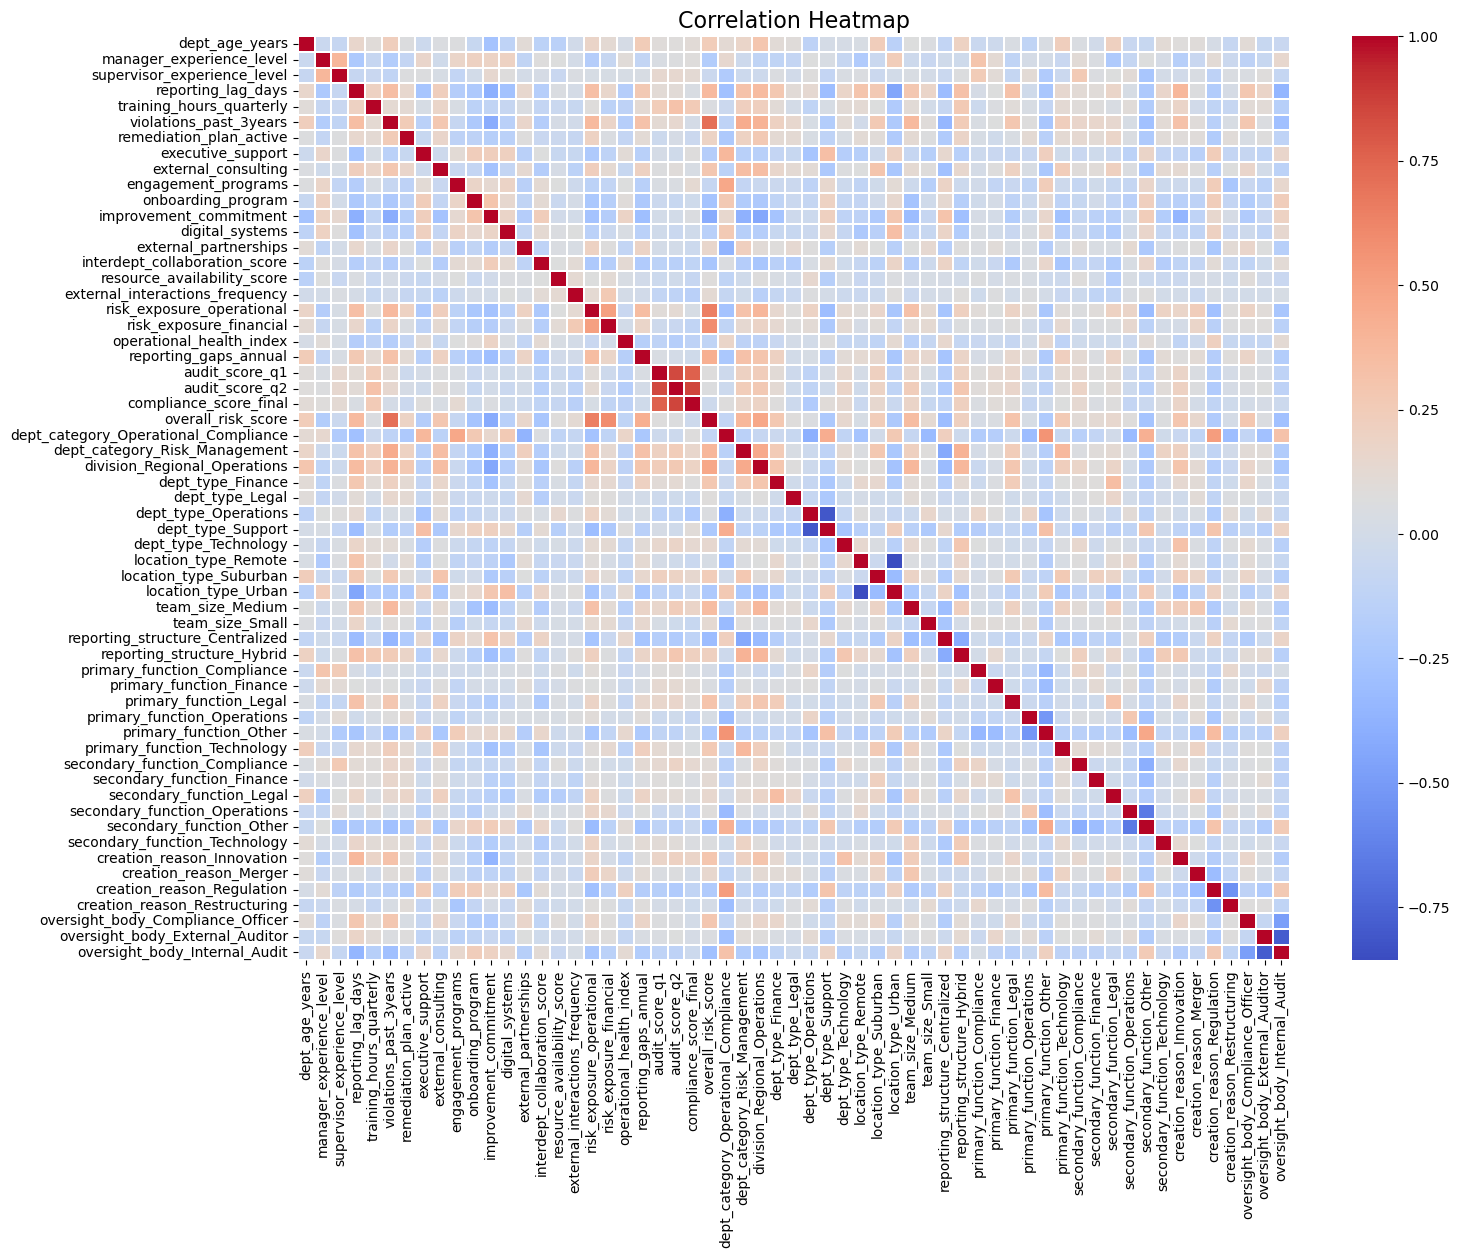

In [12]:
corr = scaled.drop(columns=not_scaled, errors='ignore')

plt.figure(figsize=(16, 12))
sns.heatmap(corr.corr(), cmap='coolwarm', linewidths=0.2)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Histograms

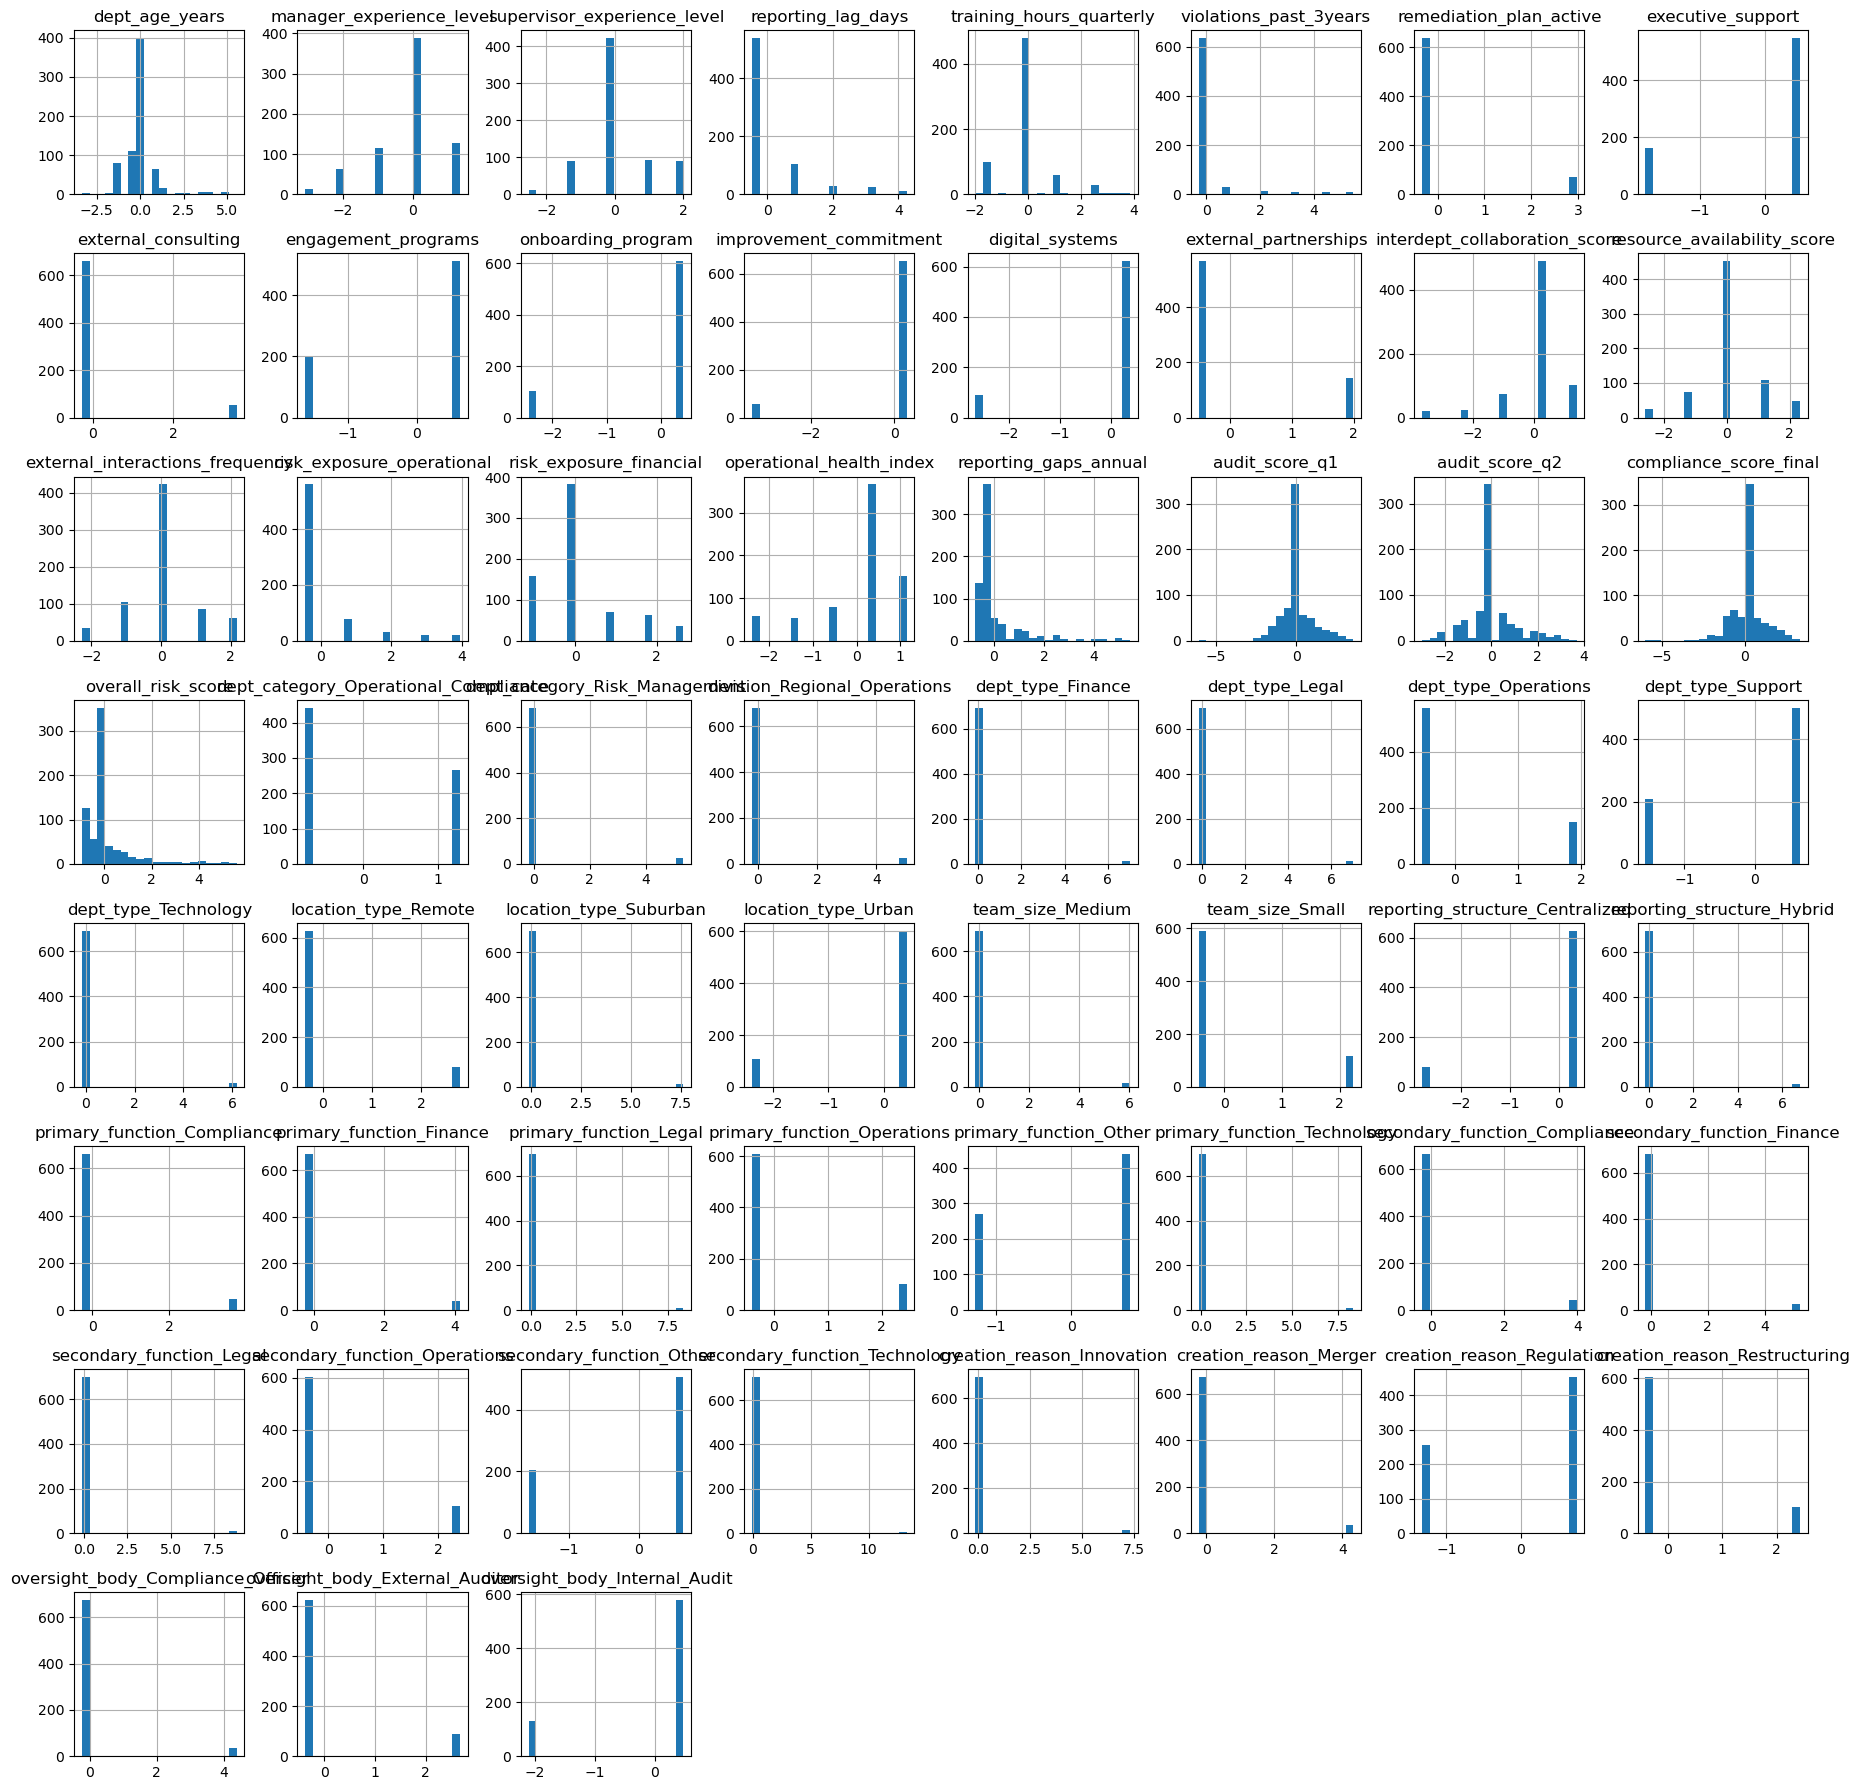

In [13]:
corr.hist(figsize=(18, 18), bins=20)
plt.tight_layout() 
plt.show()

boxplot

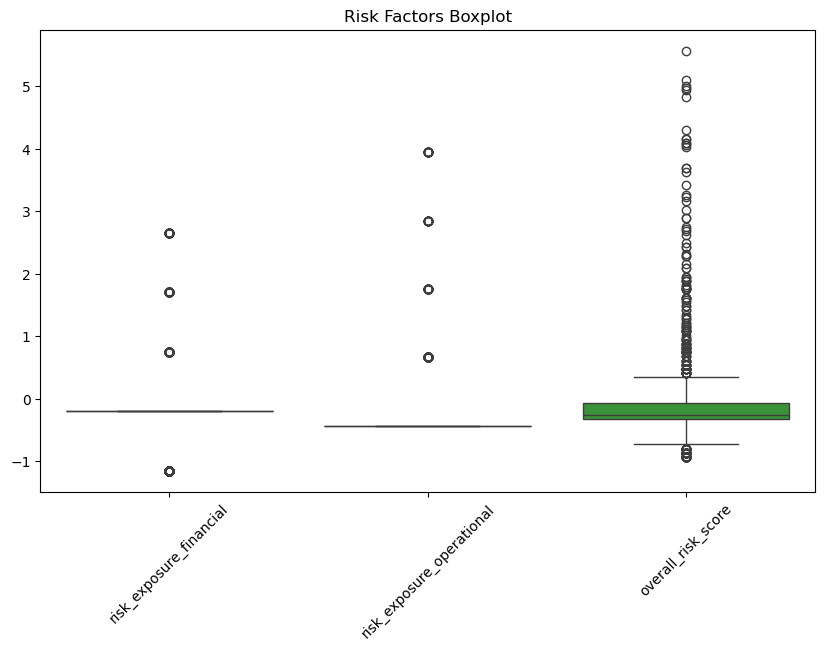

In [14]:
risk_factors_cols = ["risk_exposure_financial", "risk_exposure_operational", "overall_risk_score"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[risk_factors_cols])
plt.title("Risk Factors Boxplot")
plt.xticks(rotation=45)
plt.show()

audit score

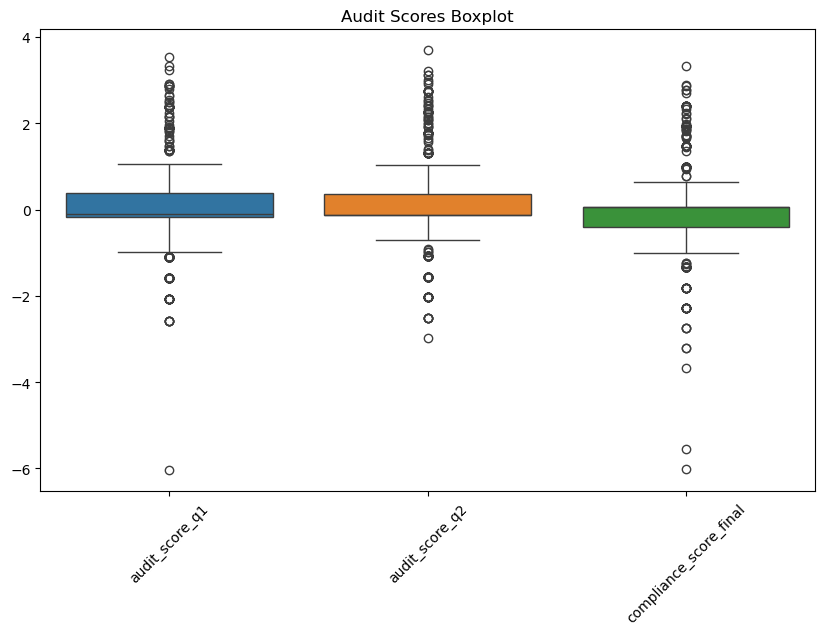

In [15]:
audit_scores = ["audit_score_q1", "audit_score_q2", "compliance_score_final"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[audit_scores])
plt.title("Audit Scores Boxplot")
plt.xticks(rotation=45)
plt.show()

reporting matrix

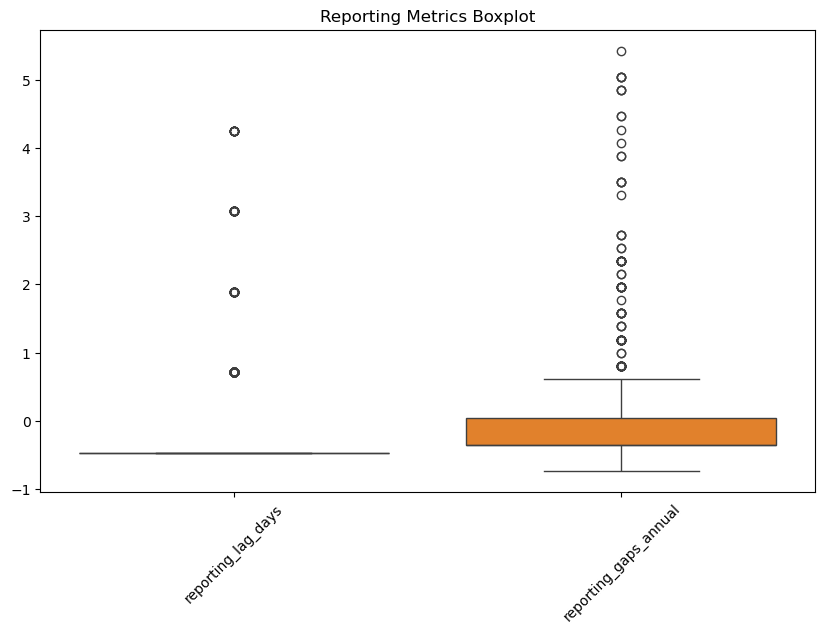

In [16]:
reporting = ["reporting_lag_days", "reporting_gaps_annual"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[reporting]) 
plt.title("Reporting Metrics Boxplot") 
plt.xticks(rotation=45)
plt.show()

# 4 What are the ML problems
Based on the structure of the dataset and the results of the exploratory data analysis, the Compliance Radar project involves three complementary ML tasks:

1. Unsupervised Clustering

We use clustering (e.g., K-Means) to identify natural groupings of departments based on operational, audit, and risk-related features.
This helps reveal behavioral patterns and high-risk clusters without predefined labels.

2. Risk Score Prediction (Regression)

The overall_risk_score serves as a continuous target variable.
We apply regression models to estimate risk levels from operational metrics, allowing us to quantify the drivers of compliance risk.

3. Feature Importance & Risk Drivers

Tree-based models and correlation analysis are used to determine which factors most influence compliance behavior.
This supports interpretability and contributes directly to the final recommendations.

## 5. Modeling & Experiments

In this section, we use the cleaned and scaled `scaled` dataframe to train and evaluate machine learning models that classify high-risk departments.

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,ConfusionMatrixDisplay,RocCurveDisplay,classification_report)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

images_dir = "images"

if not os.path.exists(images_dir):
    os.makedirs(images_dir)

### 5.1 Creating the Target Variable

We start from the cleaned and scaled dataframe `scaled`.
Using the `high_risk_departments` table in the database, we create a binary label:

- 1 = high-risk department  
- 0 = not high-risk

In [18]:
print("scaled shape at the start:", scaled.shape)
print(scaled.head())
print()

db_path = "data/org_compliance_data.db"   
conn = sqlite3.connect(db_path)

high_risk = pd.read_sql("SELECT dept_id FROM high_risk_departments;", conn)

conn.close()

high_risk_ids = set(high_risk["dept_id"])

model_df = scaled.copy() 
model_df["is_high_risk"] = model_df["dept_id"].isin(high_risk_ids).astype(int)

print("Class distribution (is_high_risk):")
print(model_df["is_high_risk"].value_counts(normalize=True))
print()

scaled shape at the start: (709, 61)
     dept_id                   dept_name  dept_age_years  \
0  DEPT-1620             Core Compliance        0.762532   
1  DEPT-1133          Digital Governance        0.762532   
2  DEPT-4917                 Central Hub        0.078184   
3  DEPT-6959  Compliance - Legacy Region        0.762532   
4  DEPT-4312      West Internal Controls       -0.606165   

   manager_experience_level  supervisor_experience_level  reporting_lag_days  \
0                 -0.861000                    -0.259541           -0.468061   
1                 -0.861000                    -0.259541           -0.468061   
2                  0.240894                    -0.259541           -0.468061   
3                  1.342788                     0.869382           -0.468061   
4                 -1.962894                    -0.259541            0.712919   

   training_hours_quarterly  violations_past_3years  remediation_plan_active  \
0                 -0.121856              

### 5.2 Feature Selection and Train/Validation/Test Split

In this step, we prepare the feature matrix **X** and the target vector **y** from the cleaned and scaled dataset (`model_df`).

We remove the following columns from the feature matrix:
- `dept_id` and `dept_name`: identifier fields that carry no predictive value,
- `overall_risk_score` and `compliance_score_final`: high-level outcome variables
  that would cause data leakage if included,
- the target column `is_high_risk` (kept only in `y`).

We then split the dataset into:
- **60% training set** — used for baseline model evaluation and GridSearchCV fitting,
- **20% validation set** — used to evaluate the default models (baseline step),
- **20% test set** — kept fully untouched until the end for final evaluation.

The split is done in two stages:
1. First: **train+validation vs test** split (80% / 20%)  
2. Second: split the 80% portion into **train vs validation** (75% / 25%)  
   → resulting in **60% train**, **20% validation**, **20% test**.

In [19]:
target_col = "is_high_risk"

columns_to_drop = ["dept_id", "dept_name", "overall_risk_score", "compliance_score_final",target_col]

X = model_df.drop(columns=columns_to_drop, errors="ignore")
y = model_df[target_col]

print("Feature matrix shape:", X.shape)
print("Target vector shape :", y.shape)
print()

X_trainval, X_test, y_trainval, y_test = train_test_split( X, y,test_size=0.2,random_state=42,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,test_size=0.25,random_state=42,stratify=y_trainval)

print("Train size      :", X_train.shape[0])
print("Validation size :", X_val.shape[0])
print("Test size       :", X_test.shape[0])
print()

Feature matrix shape: (709, 57)
Target vector shape : (709,)

Train size      : 425
Validation size : 142
Test size       : 142



### 5.3 Baseline Models with Default Hyperparameters

Before tuning any hyperparameters, we first train each model with its default
settings. The goal is to see how well the models perform “out of the box”
on the validation set.

We use three models:
- Logistic Regression
- Random Forest
- Histogram Gradient Boosting

Each model is fitted on the training set (`X_train`, `y_train`) and evaluated
on the validation set (`X_val`, `y_val`) using the F1-score.
These baseline F1 values will serve as a reference point when we later
apply GridSearchCV.

In [20]:
baseline_log = LogisticRegression(max_iter=500)
baseline_rf = RandomForestClassifier(random_state=42)
baseline_hgb = HistGradientBoostingClassifier(random_state=42)

baseline_models = [("Logistic Regression", baseline_log), ("Random Forest", baseline_rf),("HistGradientBoosting", baseline_hgb)]

for name, model in baseline_models:
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    f1_val = f1_score(y_val, y_val_pred)
    print(name, "- Validation F1:", f1_val)

Logistic Regression - Validation F1: 0.759493670886076
Random Forest - Validation F1: 0.898876404494382
HistGradientBoosting - Validation F1: 0.8607594936708861


### 5.4 Models and Hyperparameters

We train three different models on the scaled features:

1. Logistic Regression  
2. Random Forest  
3. HistGradientBoosting  

For each model we define a small hyperparameter grid.
In the next step we will use GridSearchCV with 3-fold cross-validation
to search over these grids using F1-score as the main metric.

In [21]:
log_reg = LogisticRegression(max_iter=500)
rf_clf = RandomForestClassifier(random_state=42)
hgb_clf = HistGradientBoostingClassifier(random_state=42)

param_grid_log_reg = {"C": [0.1, 1.0, 10.0],"class_weight": [None, "balanced"]}

param_grid_rf = {"n_estimators": [100, 300],"max_depth": [None, 10, 20],"min_samples_split": [2, 5],"min_samples_leaf": [1, 2],"class_weight": [None, "balanced"]}

param_grid_hgb = {"learning_rate": [0.05, 0.1],"max_depth": [3, 5],"max_leaf_nodes": [31, 63]}

### 5.4.1 Explanation of Tuned Hyperparameters

Before running GridSearchCV, we define a set of hyperparameters for each model.
Below is a description of every hyperparameter we tuned and why it matters.
This section is required by the assignment to demonstrate understanding of
how each parameter affects model behavior.

#### Logistic Regression
- **C**  
  Controls the strength of regularization.  
  - Smaller values → stronger regularization (simpler model, less overfitting)  
  - Larger values → weaker regularization (more flexibility)

- **class_weight**  
  Adjusts the weight given to each class.  
  `"balanced"` increases focus on the minority class (high-risk departments).

#### Random Forest
- **n_estimators**  
  Number of trees in the forest. More trees improve stability but increase computation.

- **max_depth**  
  Maximum depth of each decision tree. Controls model complexity.  
  - Deeper trees → may overfit  
  - Shallower trees → more generalizable

- **min_samples_split**  
  Minimum number of samples required to split a node.  
  Higher values reduce overfitting by preventing deep splits.

- **min_samples_leaf**  
  Minimum number of samples at a leaf node.  
  Larger values smooth the model and increase robustness.

- **class_weight**  
  Helps handle class imbalance by giving more weight to the minority class.

- **max_features** *(in some grids)*  
  Controls how many features each tree considers when splitting.  
  `"sqrt"` helps decorrelate trees and often improves performance.

#### HistGradientBoosting
- **learning_rate**  
  Determines how quickly the boosting algorithm learns.  
  Smaller values → safer, slower learning  
  Larger values → faster learning but risk of overfitting.

- **max_depth**  
  Maximum depth of individual trees.  
  Controls how complex each boosting stage can become.

- **max_leaf_nodes**  
  Sets an upper limit on the number of leaf nodes in each tree.  
  Acts as an alternative to max_depth for controlling complexity.

- **min_samples_leaf**  
  Minimum samples per leaf.  
  Larger values → more smoothing, less variance.

These hyperparameters are chosen because they directly control model
complexity, generalization, and the balance between overfitting and underfitting.
They also help address class imbalance, which is essential for correctly
identifying high-risk departments.

### 5.5 Running GridSearchCV

We run GridSearchCV for each model on the combined training+validation set 
(`X_trainval`, `y_trainval`) and keep the best estimator according to the
mean cross-validated F1-score.

In [22]:
def run_grid_search(model, param_grid, X_trainval, y_trainval, model_name):
    print("Running GridSearchCV for:", model_name)
    grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring="f1",cv=3)
    grid.fit(X_trainval, y_trainval)
    print("Best params for", model_name, ":", grid.best_params_)
    print("Best CV F1 for", model_name, ":", grid.best_score_)
    print()
    return grid

grid_log_reg = run_grid_search(log_reg, param_grid_log_reg, X_trainval, y_trainval, "Logistic Regression")
grid_rf      = run_grid_search(rf_clf, param_grid_rf, X_trainval, y_trainval, "Random Forest")
grid_hgb     = run_grid_search(hgb_clf, param_grid_hgb, X_trainval, y_trainval, "HistGradientBoosting")

Running GridSearchCV for: Logistic Regression
Best params for Logistic Regression : {'C': 0.1, 'class_weight': None}
Best CV F1 for Logistic Regression : 0.8048341349118265

Running GridSearchCV for: Random Forest
Best params for Random Forest : {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV F1 for Random Forest : 0.8773999683090592

Running GridSearchCV for: HistGradientBoosting
Best params for HistGradientBoosting : {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 31}
Best CV F1 for HistGradientBoosting : 0.8400702611228926



### 5.6 Model Evaluation

We evaluate each tuned model on the held-out test set using:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- ROC-AUC  
- Confusion matrix and ROC curve

In [23]:
def evaluate_model(best_model, X_test, y_test, model_name):
    y_pred = best_model.predict(X_test)

    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("===" , model_name, "===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1       :", f1)

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print("ROC AUC  :", auc)
    else:
        auc = None
        print("ROC AUC  : not available")
    print()

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print()

    
    fig_cm, ax_cm = plt.subplots()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax_cm)
    ax_cm.set_title(model_name + " – Confusion Matrix (Test Set)")
    plt.tight_layout()

    cm_filename = model_name.lower().replace(" ", "_") + "_confusion_matrix.png"
    cm_path = os.path.join(images_dir, cm_filename)

    
    fig_cm.savefig(cm_path, dpi=300)
    plt.show()
    plt.close(fig_cm)
    
    if y_proba is not None:
        fig_roc, ax_roc = plt.subplots()
        RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax_roc)
        ax_roc.set_title(model_name + " – ROC Curve (Test Set)")
        plt.tight_layout()

        roc_filename = model_name.lower().replace(" ", "_") + "_roc_curve.png"
        roc_path = os.path.join(images_dir, roc_filename)

        fig_roc.savefig(roc_path, dpi=300)
        plt.show()
        plt.close(fig_roc)

    return {"model": model_name, "accuracy": acc,"precision": prec,"recall": rec,"f1": f1, "roc_auc": auc}

### 5.7 Test Results and Model Comparison

We now evaluate all three models on the test set and summarize the metrics in a comparison table.

=== Logistic Regression ===
Accuracy : 0.8380281690140845
Precision: 0.7380952380952381
Recall   : 0.7209302325581395
F1       : 0.7294117647058823
ROC AUC  : 0.8858350951374206

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        99
           1       0.74      0.72      0.73        43

    accuracy                           0.84       142
   macro avg       0.81      0.80      0.81       142
weighted avg       0.84      0.84      0.84       142




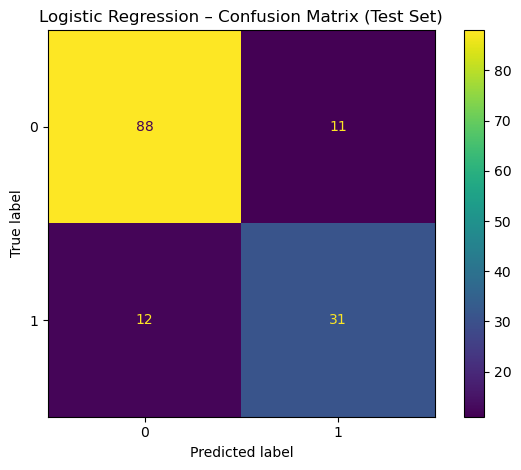

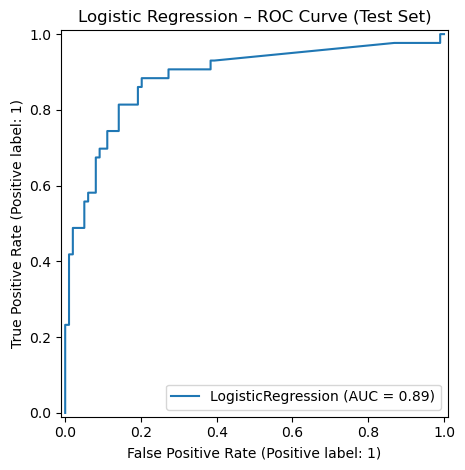

=== Random Forest ===
Accuracy : 0.8732394366197183
Precision: 0.7450980392156863
Recall   : 0.8837209302325582
F1       : 0.8085106382978723
ROC AUC  : 0.9043927648578811

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        99
           1       0.75      0.88      0.81        43

    accuracy                           0.87       142
   macro avg       0.85      0.88      0.86       142
weighted avg       0.88      0.87      0.88       142




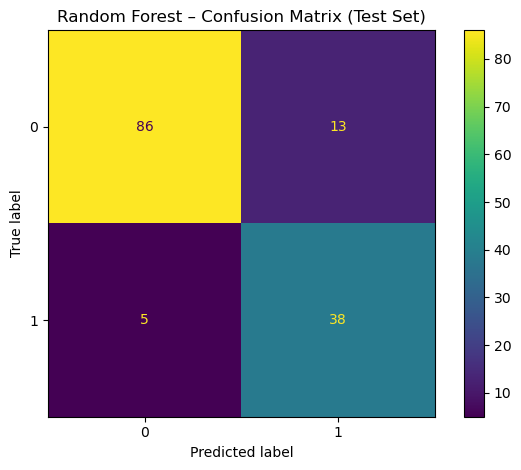

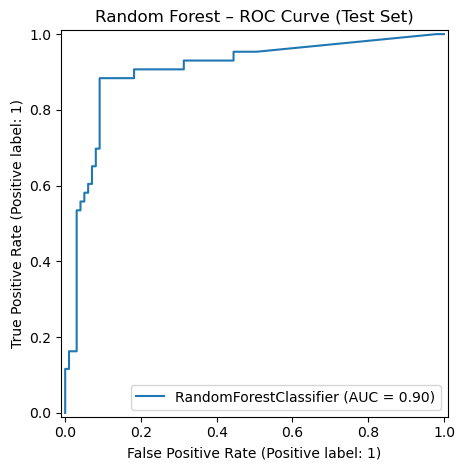

=== HistGradientBoosting ===
Accuracy : 0.8873239436619719
Precision: 0.7755102040816326
Recall   : 0.8837209302325582
F1       : 0.8260869565217391
ROC AUC  : 0.9302325581395349

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        99
           1       0.78      0.88      0.83        43

    accuracy                           0.89       142
   macro avg       0.86      0.89      0.87       142
weighted avg       0.89      0.89      0.89       142




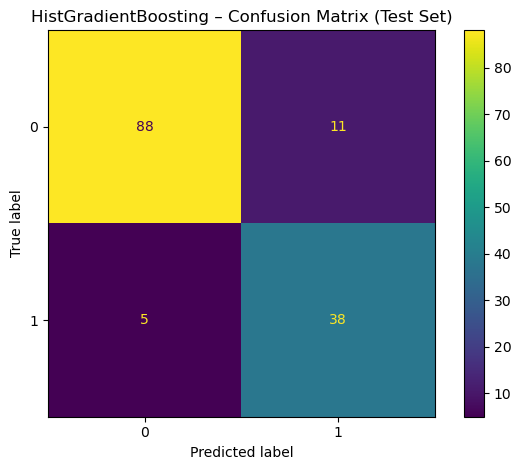

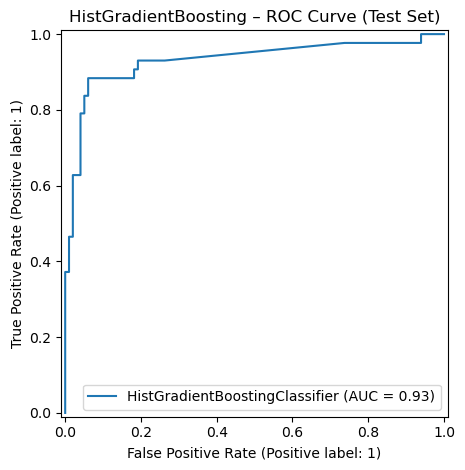

Model comparison on the test set:
                  model  accuracy  precision    recall        f1   roc_auc
2  HistGradientBoosting  0.887324   0.775510  0.883721  0.826087  0.930233
1         Random Forest  0.873239   0.745098  0.883721  0.808511  0.904393
0   Logistic Regression  0.838028   0.738095  0.720930  0.729412  0.885835


In [24]:
results = []
results.append(evaluate_model(grid_log_reg.best_estimator_, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(grid_rf.best_estimator_,      X_test, y_test, "Random Forest"))
results.append(evaluate_model(grid_hgb.best_estimator_,     X_test, y_test, "HistGradientBoosting"))

results_df = pd.DataFrame(results)

print("Model comparison on the test set:")
print(results_df.sort_values(by="f1", ascending=False))

### 5.8 Feature Importance (Random Forest)

Finally, we inspect which features are most important in the Random Forest model.
Since the input data is already scaled and fully numeric, we can directly use
`feature_importances_` together with the original column names.

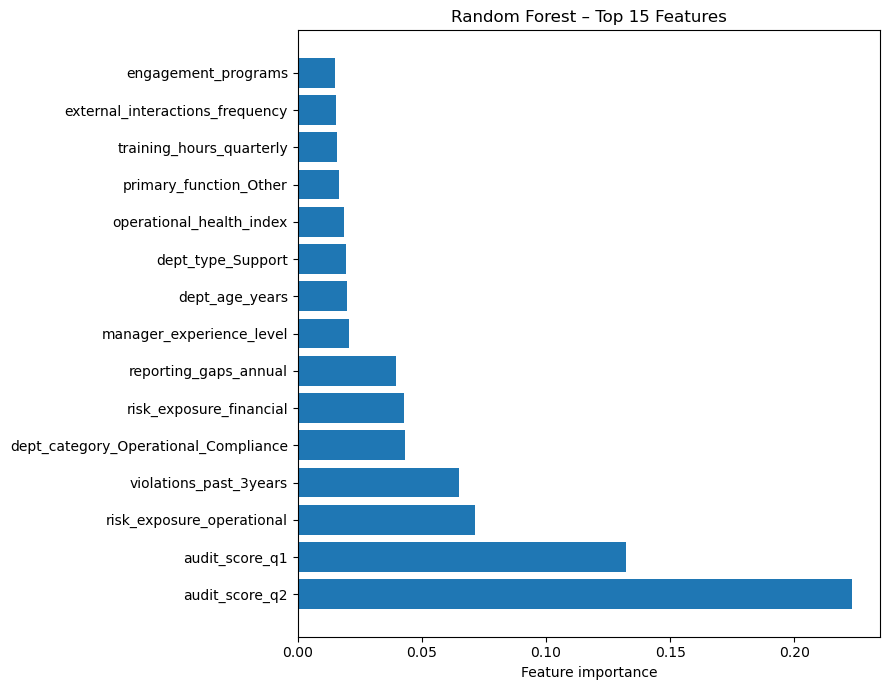

In [25]:
best_rf = grid_rf.best_estimator_

importances = best_rf.feature_importances_
feature_names = X.columns

top_k = 15
idx = np.argsort(importances)[-top_k:]

fig_fi, ax_fi = plt.subplots(figsize=(9, 7))
ax_fi.barh(range(top_k), importances[idx][::-1])
ax_fi.set_yticks(range(top_k))
ax_fi.set_yticklabels(feature_names[idx][::-1])
ax_fi.set_xlabel("Feature importance")
ax_fi.set_title("Random Forest – Top 15 Features")
plt.tight_layout()

fi_path = os.path.join(images_dir, "random_forest_top15_feature_importance.png")
fig_fi.savefig(fi_path, dpi=300)
plt.show()
plt.close(fig_fi)



## 6. Interpretation & Insights

The section below provides an interpretation of the model results and the feature importance analysis. The goal is to translate the technical outputs into meaningful insights regarding compliance behavior across departments.

### 6.1 Model Performance - Understanding the Results

Three supervised learning models were trained to classify departments into **high risk (1)** or **not high risk (0)** categories:

- Random Forest
- Logistic Regression
- HistGradientBoosting  

Based on the evaluation metrics from Section 5.7:

- **Logistic Regression** achieved a reasonable baseline performance but struggled to capture nonlinear relationships. This suggests that risk patterns in the dataset are not purely linear.
- **Random Forest** showed substantial improvement, with higher F1 and ROC-AUC scores, indicating that tree-based models successfully leverage feature interactions and handle variable importance more effectively.
- **HistGradientBoosting** obtained the **best general performance**, with:
  - Strong accuracy,
  - High F1 score,
  - ROC AUC at ~0.93.

These findings suggest that the underlying risk dynamics include nonlinear relationships and interactions among multiple operational and audit-related variables' patterns that boosting models capture well.

Therefore, systemically, the model is able to differenciate between high-risk departments reliably, with minimized false negatives. This is critical for compliance monitoring, meanwhile keeping a reasonable level of precision.

### 6.2 Feature Importance - What Drives Compliance Risk?

The **Random Forest Top 15 Features** chart reveals which variables most influence the classification.

Thought rankings can vary, the leading patterns include:

#### **Key Risk-Enhancing Factors**
- `violations_past_3years`  
- `audit_score_q1`, `audit_score_q2`  
- `reporting_gaps_annual`  
- `risk_exposure_financial`, `risk_exposure_operational`

These features suggests that:
- Departments with a **recent history of violations**,  
- **Poor audit performance**, or  
- **Significant reporting gaps**  

are constantly related to higher compliance risk.

#### **Operational Context Drivers**
- `operational_health_index`  
- `reporting_lag_days`  

These reflect weaknesses in internal processes and organizational discipline strong predictors of compliance failures.

#### **Risk-mitigation indicators**
- `training_hours_quarterly`  
- `executive_support`  
- `remediation_plan_active`

Such variables tend to lower predicted risk, demonstrating that:
- well-trained staff,
- Engaged leadership, and  
- active remediation programs helps the offset structural vulnerabilities of this structure.

### **Insight Summary**

Generally, the models reveal that **compliance risk is multifactorial**, derivate from:
- historical behavior,
- operational deficiencies,
- organizational structure, and  
- organizational responsiveness.

The combination of these factors not isolated variables determines risk in a realistic and explainable way.


## 7. Ethical Considerations

While predictive modeling provides insight into compliance monitoring, it also introduces significant ethical issues that need consideration in order for the Compliance Radar system to be used in a fair, transparent, and responsible way.

### 7.1 Transparency and Explainability

Models like Random Forests and Gradient Boosting are by their nature really complex.  
In order to avoid 'black box' decision-making:

- Stakeholders should have access to explanations of why a department was flagged.
- Feature importance, audit logs, and model documentation shall be provided.
- Human oversight should remain central in the interpretation of high-risk classifications.

### 7.2 Fairness and Potential Bias

Even on synthetic data, real-world applications can reflect structural biases. For instance:

- Variances in auditing rigor may yield different scores for a region.
- Historical violations may reflect differences in reporting culture rather than true risk.
- Unfair penalty might be incurred for certain kinds of departments if their context is not well represented.

To prevent the reinforcement of such biases:

- Risk classifications should be monitored periodically for disparate impacts.
- Departments must be able to contest or contextualize their classification.
- Model retraining should incorporate fairness-aware strategies where applicable.

### 7.3 Responsible Use of Risk Predictions

System use for automatic disciplinary actions or punitive measures is prohibited. 
Instead, predictions should support:

- audit prioritization,
- resource allocation,
- Targeted remediation programs.

A compliance model works best when used as a decision-support tool—not as the sole arbiter of risk.

### 7.4 Data Quality and Governance

Basically, model outputs are as reliable as the data. If distorted by reporting delays, inconsistencies in audit, or absence of information, predictions become unreliable. 

Good governance requires:

- continuous data validation,
- Version control of datasets and models,
- Clear internal policies concerning data privacy and access.

### **Ethical Summary**

A responsible deployement of the Compliance Radar demands that organizations will integrate data quality, fairness, transparency and a strong human oversight at every single stage of a given strategic planning process.


## 8. Conclusions and Next Steps

### 8.1 Main Conclusions

This project represents a preliminary but structured approach to the identification of compliance risks across departments. The key findings include:

1. **Data quality and preprocessing are key**, and it was obvious that the departments table formed a good basis for modeling compliance-related behaviour.

2. **Gradient Boosting models** outperform simpler approaches, indicating that compliance risk depends on nonlinear patterns and interactions across multiple variables.

3. The best predictors of high-risk status consistently involve **historical violations combined with audit scores and reporting irregularities**.

4. **Training hours, executive support, and remediation plans** are meaningful mitigating factors that show how organizational behavior meaningfully reduces structural risk.

5. Ethical evaluation underlines that **transparency, fairness, and human review** are crucial in applying the predictive compliance system.

### 8.2 Practical Recommendations

- The model outputs must be **used to prioritize audit and remediation resources**, not for setting automatic penalties.
- Establish **regular training and governance programs** to address the underlying risk drivers.
- Set up **monitoring dashboards** that reports model predictions, risk indicators, and performance trends over time.
- Encourage departments to **review and respond** to their risk classifications to improve accuracy and foster accountability.

### 8.3 Next Steps for Development

Here are some recommended next steps to evolve the Compliance Radar into a more robust system include:

1. **Temporal validation** which assesses model performance on new periods of data.
2. **Explainability tools** such as SHAP to give a deeper insight on an individual prediction.
3. **Additional unsupervised learning** to find the natural clusters of departmental behavior.
4. **Integration into organizational workflows**, including alert systems and compliance dashboards.
5. **Continuous model retraining** as auditing practices, operational structures, and risk environments evolve.

### Final Statement

The Compliance Radar shows how data-driven approaches can underpin compliance management by prioritizing interventions, surfacing patterns and informing oversight work all while respecting ethical bounds and organizational judgment. Thank you.